In [34]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#air = pd.read_csv("/Users/agallagher/Air-Quality-Forecast-Challenge/data/processing/1h_allData.csv")
air = pd.read_csv("/Users/agallagher/Air-Quality-Forecast-Challenge/data/processing/30min_allData.csv")

#convert appropriate columns to datetime format
air['time'] = pd.to_datetime(air['time'], yearfirst=True, utc = True)
air['sunrise'] = pd.to_datetime(air['sunrise'], yearfirst=True, utc = True)
air['sunset'] = pd.to_datetime(air['sunset'], yearfirst=True, utc = True)
air['noon'] = pd.to_datetime(air['noon'], yearfirst=True, utc = True)

#preserve date info when using 'time' as index
air['date'] = air['time']
air.set_index('time', inplace = True)
air.index = air.index.tz_convert("Europe/Zurich")

In [36]:
air.head(10)
air.columns

Index(['date', 'weekday', 'hour', 'loc', 'temp_pi', 'temp_sbs', 'temp_blue',
       'hum_pi', 'hum_sbs', 'hum_blue', 'PM1_pi', 'PM2.5_pi', 'PM10_pi',
       'PM2.5_sbs', 'PM10_sbs', 'precip', 'wind', 'wind_speed',
       'wind_direction', 'cloud_cover', 'pressure', 'AQI', 'sunrise', 'noon',
       'sunset', 'daylight'],
      dtype='object')

In [37]:
# Rearrange data based on plotting needs
air_melt_hum = pd.melt(air, value_vars = ['hum_pi', 'hum_blue', 'hum_sbs'], ignore_index = False)

air_melt_PM = pd.melt(air, id_vars = 'date', value_vars = ['PM1_pi', 'PM2.5_pi', 'PM10_pi', 'PM2.5_sbs','PM10_sbs'], ignore_index = False)
air_melt_PM['date'] = pd.to_datetime(air_melt_PM['date'], yearfirst=True, utc = True)


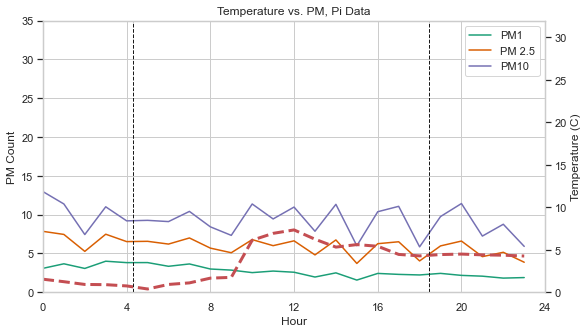

In [39]:
### Single-Day Plot: Humidity vs. PM (PI ONLY)

#get data into correct format, choose day
air_sampled = air.query('date.dt.day == [7]')
air_sampled = air_sampled[['date', 'temp_pi', 'hum_pi','PM1_pi', 'PM2.5_pi', 'PM10_pi', 'sunrise', 'sunset']]
air_melt = pd.melt(air_sampled[['date','PM1_pi', 'PM2.5_pi', 'PM10_pi']], id_vars = 'date')

## Plot PM Data using long format
sns.set_theme(style = "whitegrid")
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches([9, 5])

g1 = sns.lineplot(data = air_melt, x = air_melt['date'].dt.hour, y = 'value',  
                   hue = 'variable', palette = "Dark2", ci = None)

g1.set(xlabel = "Hour", ylabel = "PM Count", 
        xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
        ylim=(0, 35), yticks = [0,5,10,15,20,25,30,35])

plt.title('Temperature vs. PM, Pi Data')
plt.xticks(rotation = 0);
plt.legend(['PM1', 'PM 2.5', 'PM10'])

## Plot Temperature Data overlay using original format
ax2 = plt.twinx()
g2 = sns.lineplot(data = air_sampled, x = air_sampled['date'].dt.hour, y = 'temp_pi',
                  color = "r", linewidth = 3,linestyle ='dashed',
                  ax = ax2, ci = None)

# add sunrise/sunset info... a bit hackey
plt.axvline(x = air_sampled['sunrise'][0].hour + air_sampled['sunrise'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)
plt.axvline(x = air_sampled['sunset'][0].hour + air_sampled['sunset'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)

g2.set(xlabel = "Hour", ylabel = "Temperature (C)", 
       xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
       ylim=(0, 32), yticks = [0,5,10,15,20,25,30])

plt.xticks(rotation = 0); 
ax2.grid(False)

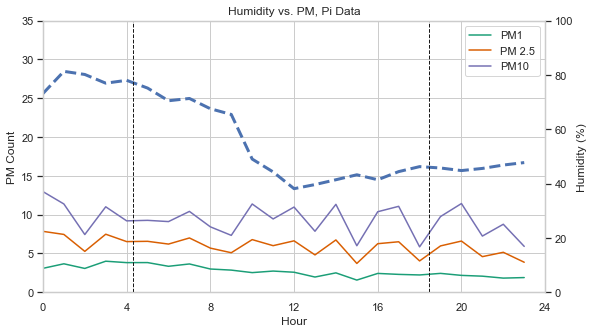

In [40]:
## Single-Day Plot: Humidity vs. PM (PI ONLY)
fig, ax = plt.subplots()
fig.set_size_inches([9, 5])

g1 = sns.lineplot(data = air_melt, x = air_melt['date'].dt.hour, y = 'value', 
                   hue = 'variable', palette = "Dark2", ci = None)

g1.set(xlabel = "Hour", ylabel = "PM Count", 
        xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
        ylim=(0, 35), yticks = [0,5,10,15,20,25,30,35])

plt.xticks(rotation = 0);
plt.legend(['PM1', 'PM 2.5', 'PM10'])
plt.title('Humidity vs. PM, Pi Data')

ax3 = plt.twinx()
g3 = sns.lineplot(data = air_sampled, x = air_sampled['date'].dt.hour, y = 'hum_pi', 
                  color = 'b', linewidth = 3,linestyle ='dashed', 
                  ax = ax3, ci = None)

plt.axvline(x = air_sampled['sunrise'][0].hour + air_sampled['sunrise'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)
plt.axvline(x = air_sampled['sunset'][0].hour + air_sampled['sunset'][0].minute/60, 
            color = "k", linestyle ='dashed', linewidth = 1)

g3.set(xlabel = "Hour", ylabel = "Humidity (%)", 
       xlim=(0, 24), xticks = [0,4,8,12,16,20,24],
       ylim=(0, 100))

ax3.grid(False)


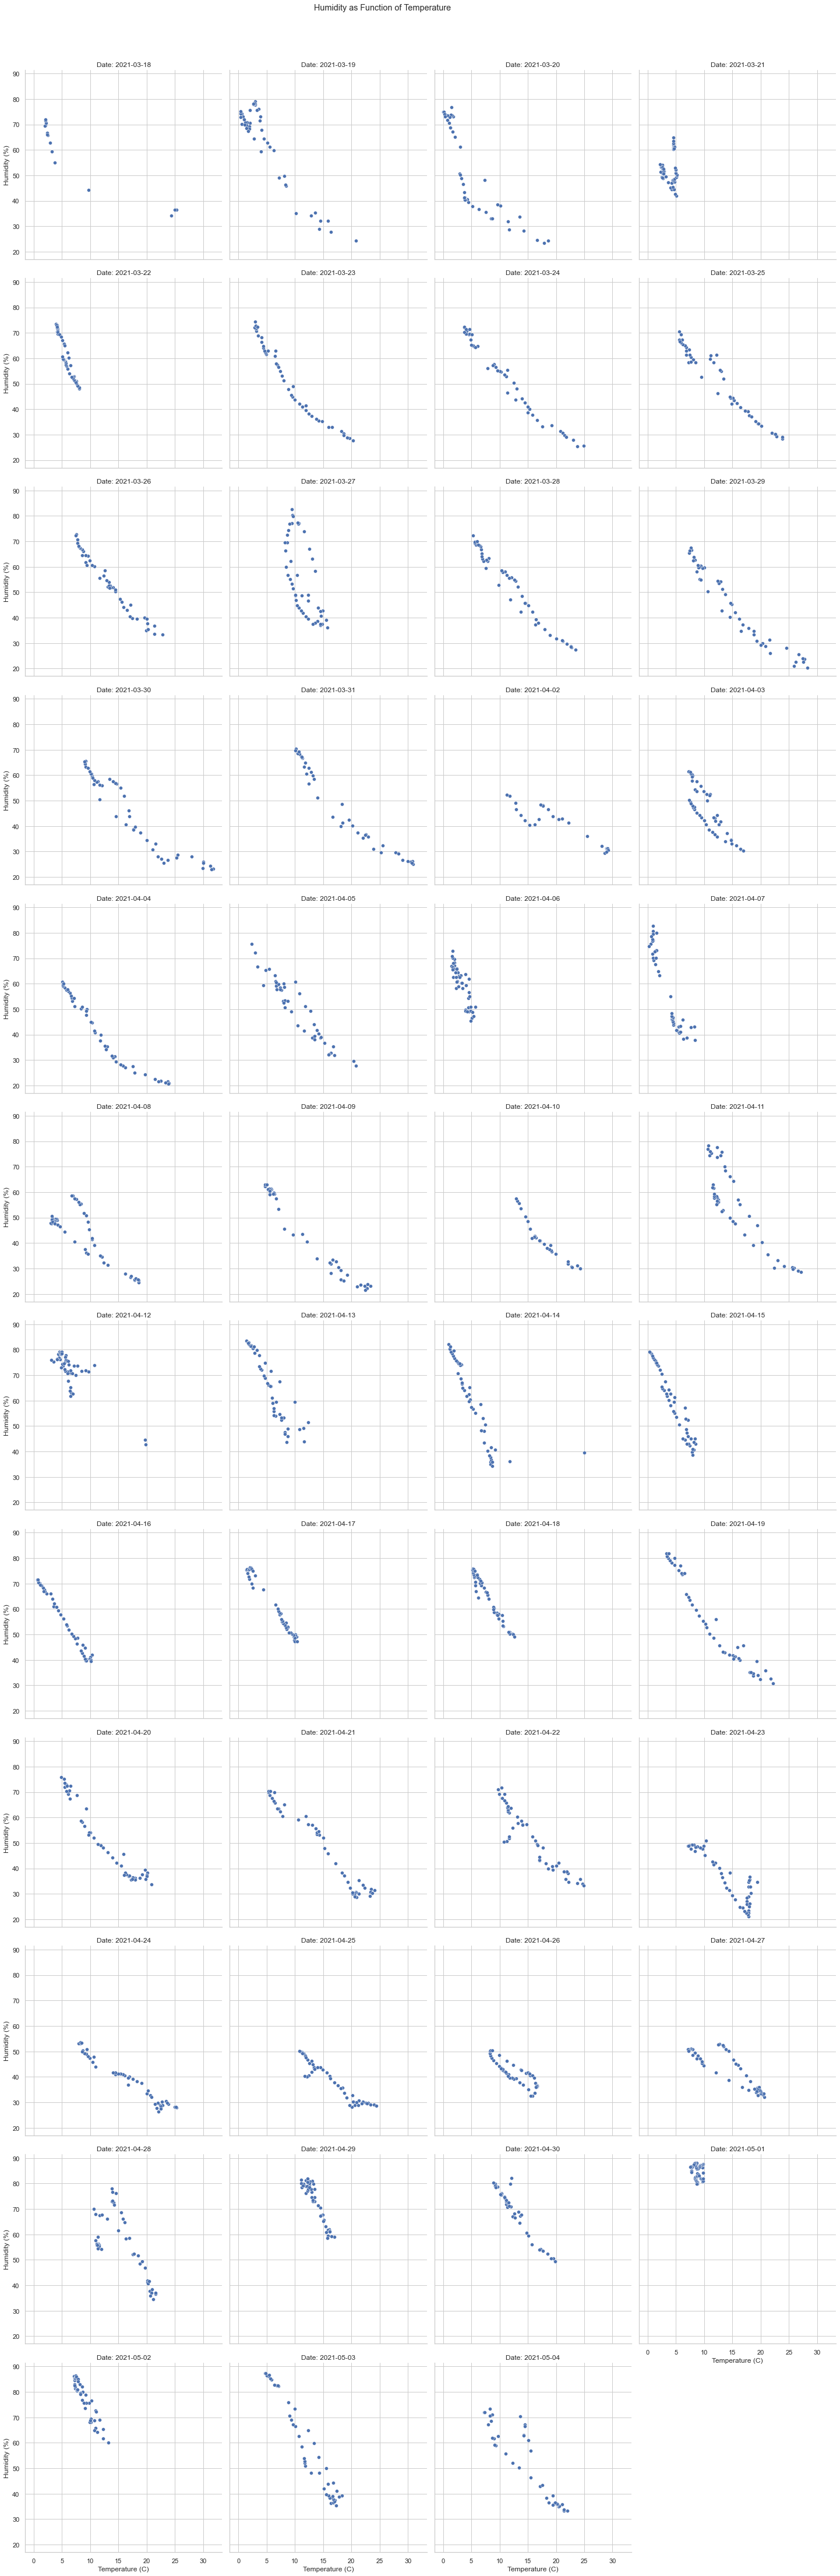

In [41]:
# temperature vs. humidity by day; joint plot is a summary of this
sns.set_theme(style = "whitegrid")
sns.set_context("notebook")

g = sns.relplot(x = "temp_pi", y = "hum_pi", 
               col = air['date'].dt.date, col_wrap = 4, kind = "scatter",
               data = air)

g.fig.suptitle("Humidity as Function of Temperature", y = 1.02, x = 0.45)
g.set_titles("Date: {col_name}")
g.set(xlabel = "Temperature (C)", ylabel = "Humidity (%)")

plt.show()

In [9]:
# loop over date range for use in plotting each day
for i in range(23,25):
    date = "2021-03-{}".format(i)
    print(air[date].head())

                                               date  weekday  hour loc  \
time                                                                     
2021-03-23 00:00:00+01:00 2021-03-22 23:00:00+00:00        1     0   A   
2021-03-23 01:00:00+01:00 2021-03-23 00:00:00+00:00        1     1   A   
2021-03-23 02:00:00+01:00 2021-03-23 01:00:00+00:00        1     2   A   
2021-03-23 03:00:00+01:00 2021-03-23 02:00:00+00:00        1     3   A   
2021-03-23 04:00:00+01:00 2021-03-23 03:00:00+00:00        1     4   A   

                            temp_pi  temp_sbs  temp_blue     hum_pi  hum_sbs  \
time                                                                           
2021-03-23 00:00:00+01:00  5.083333       NaN   2.136313  60.258333      NaN   
2021-03-23 01:00:00+01:00  4.858333       NaN   1.296313  61.775000      NaN   
2021-03-23 02:00:00+01:00  4.700000       NaN   0.746313  62.741667      NaN   
2021-03-23 03:00:00+01:00  4.416667       NaN   0.216313  64.466667      NaN   
2

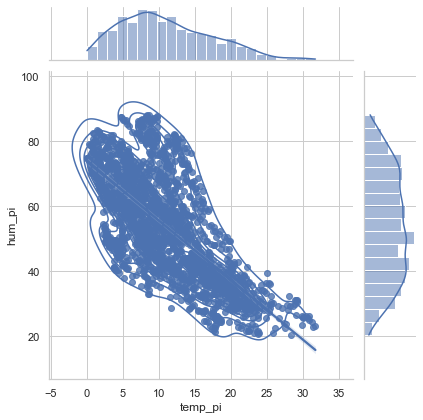

In [42]:
g = sns.jointplot(data = air, x = 'temp_pi', y = 'hum_pi', kind = "reg").plot_joint(sns.kdeplot)

##sns.jointplot(data = air, x = 'PM10', y = 'AQI', kind= "reg").plot_joint(sns.kdeplot)

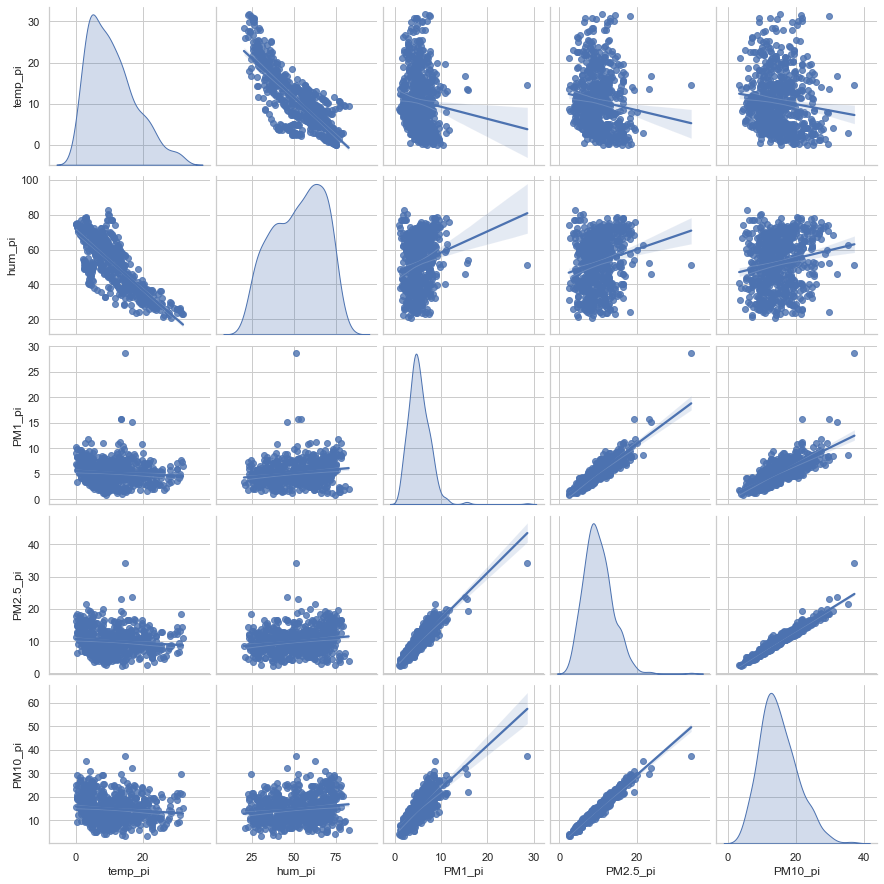

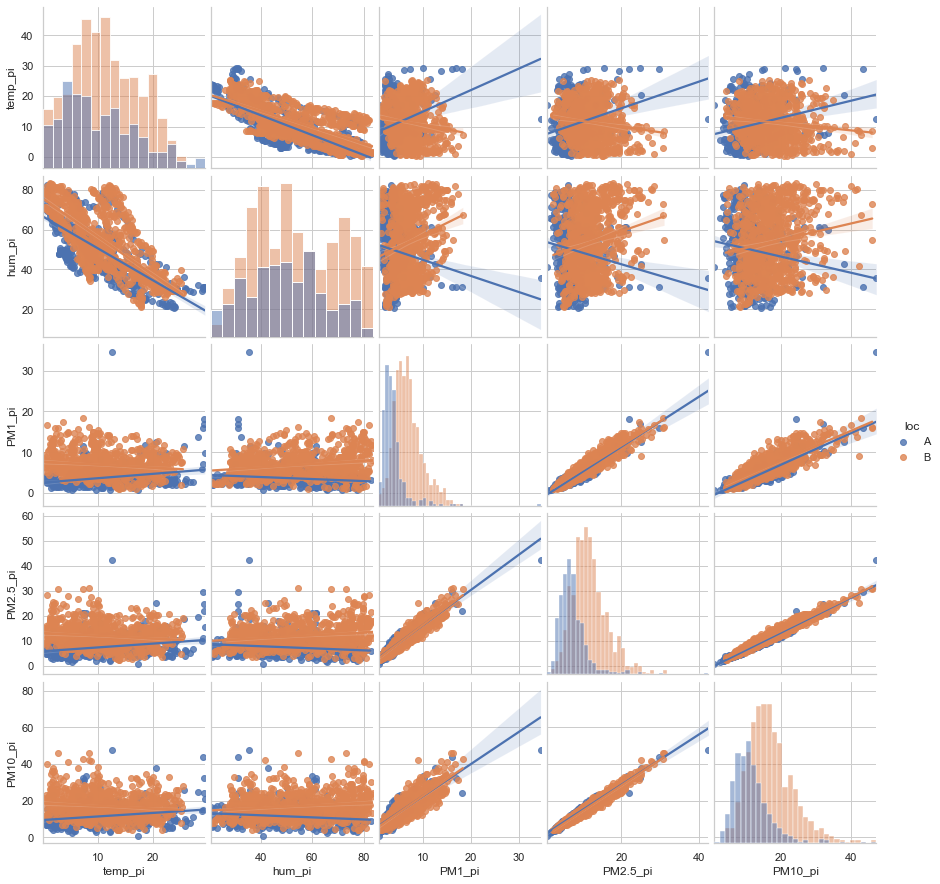

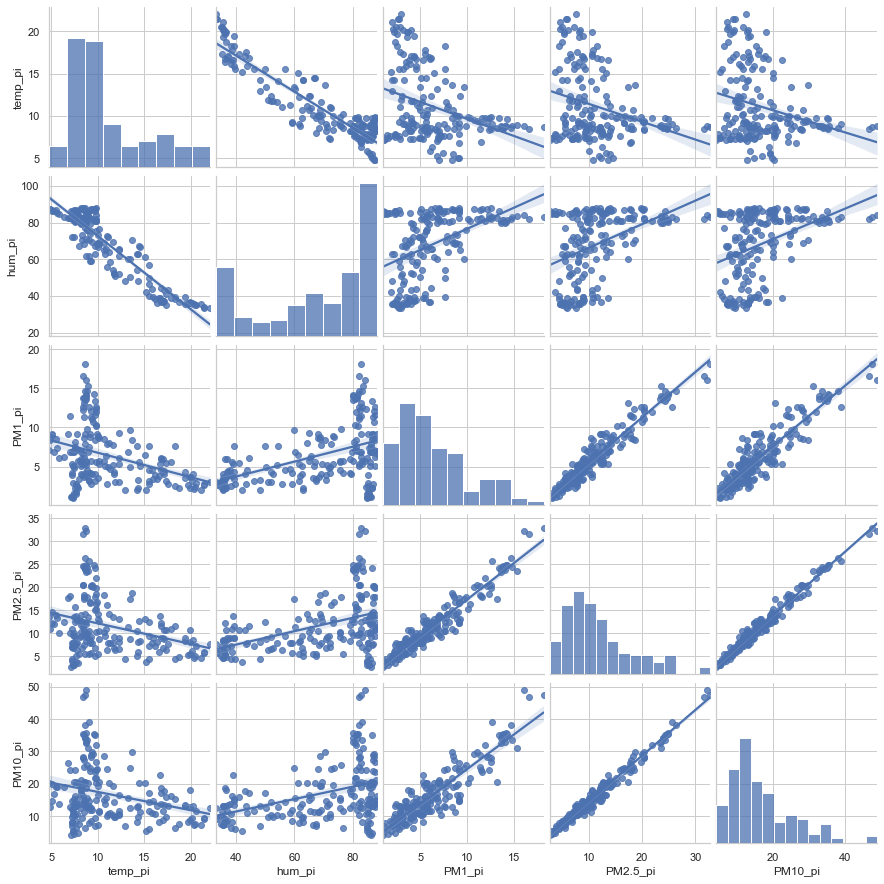

In [45]:
# can also filter using df.query('X < ###')
#march
g.march = sns.pairplot(air.query('date.dt.month == 3'),  vars = ["temp_pi", "hum_pi", "PM1_pi", "PM2.5_pi", "PM10_pi"],
                 kind = "reg", diag_kind = "kde")
#april
g.april = sns.pairplot(air.query('date.dt.month == 4'),  vars = ["temp_pi", "hum_pi", "PM1_pi", "PM2.5_pi", "PM10_pi"],
                       kind = "reg", diag_kind = "hist", hue = 'loc')

g.may = sns.pairplot(air.query('date.dt.month == 5'),  vars = ["temp_pi", "hum_pi", "PM1_pi", "PM2.5_pi", "PM10_pi"],
                       kind = "reg", diag_kind = "hist")

In [68]:
weekday_PM = air.groupby('weekday')['PM10_pi'].mean()
weekday_count = air.groupby('weekday')['PM10_pi'].count()
print(weekday_PM)
print(weekday_count)

air['weekday'].value_counts()
air['weekday'].unique()

air_pivot = air.pivot_table(values = ['temp_pi', 'hum_pi', 'PM1_pi', 'PM2.5_pi', 'PM10_pi'], index = 'weekday')
air_pivot.head(10)



weekday
0    13.998371
1    14.898600
2    14.824624
3    14.458672
4    16.290472
5    17.813422
6    14.226441
Name: PM10_pi, dtype: float64
weekday
0    336
1    334
2    282
3    253
4    303
5    312
6    335
Name: PM10_pi, dtype: int64


,PM10_pi,PM1_pi,PM2.5_pi,hum_pi,temp_pi
weekday,,,,,
0,13.998371,5.091961,9.511353,54.785332,10.722515
1,14.898600,5.465142,10.149826,52.665536,10.945094
2,14.824624,5.638031,10.217482,53.320378,11.343644
3,14.458672,5.291488,9.842856,55.161586,11.027660
4,16.290472,6.363460,11.326588,52.524945,11.261023
5,17.813422,6.759607,12.268262,54.610267,10.607489
6,14.226441,5.152123,9.652686,53.852020,11.143915


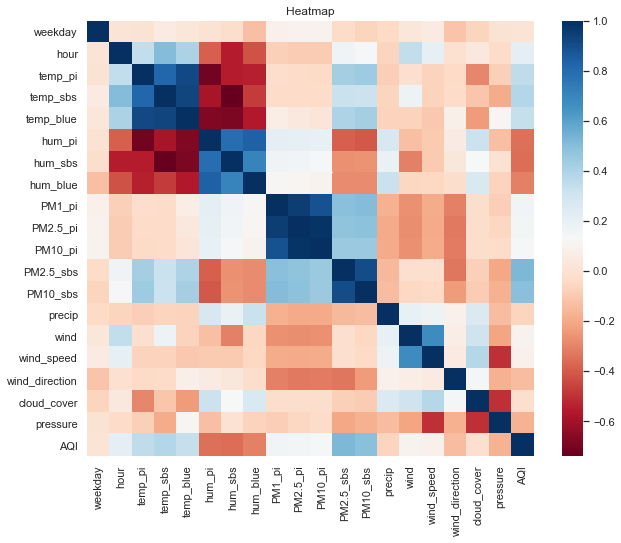

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 8])

sns.heatmap(air.corr(), cmap="RdBu")
plt.title('Heatmap')
plt.show()

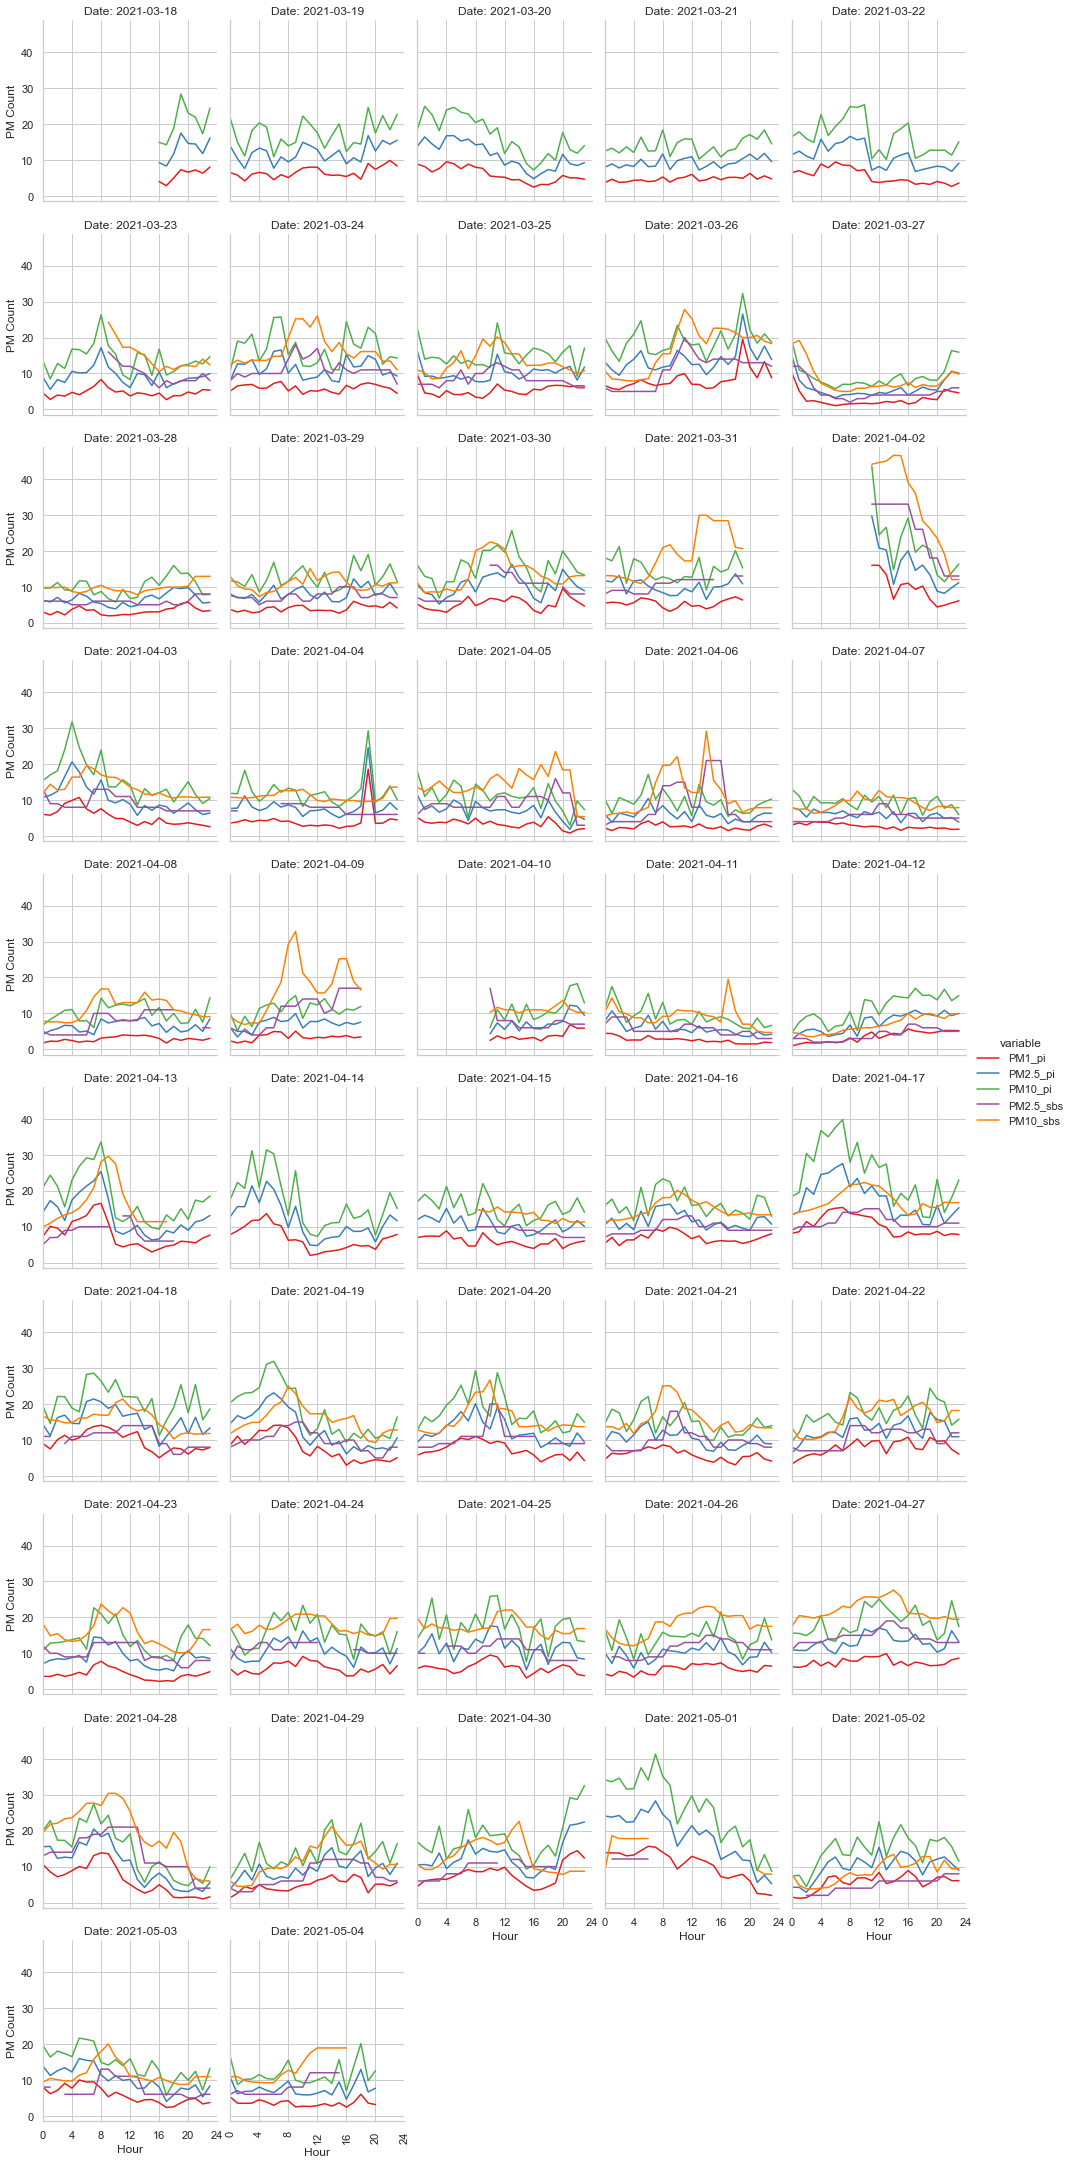

In [14]:
# Show plots of all PM data to look for missing values, strange trends

g = sns.relplot(x = air_melt_PM['date'].dt.hour, palette = "Set1",
                y = "value", kind = "line", hue = 'variable', 
                col = air_melt_PM['date'].dt.date, col_wrap = 5,
                height=3, aspect=.9, linewidth=1.5,
                data = air_melt_PM)

#g.fig.suptitle("PM1, PM2.5, PM10", y = 1.01, x = 0.45)
g.set(xlabel = "Hour", ylabel = "PM Count", xlim=(0, 24), xticks = [0,4,8,12,16,20,24])
g.set_titles("Date: {col_name}")
#g.set_xticklabels(rotation=45)

plt.xticks(rotation=90);

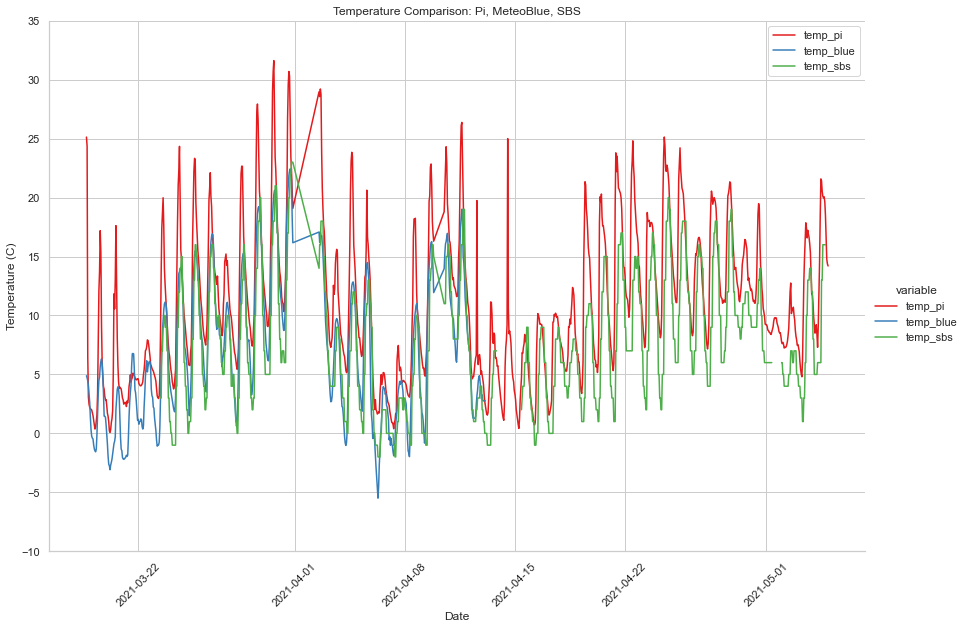

In [15]:
air_melt_temp = pd.melt(air, value_vars = ['temp_pi', 'temp_blue', 'temp_sbs'], ignore_index = False)

g = sns.relplot(data = air_melt_temp, x = air_melt_temp.index, y = 'value', 
                hue  = 'variable', palette = 'Set1',
                kind = "line", height = 8, aspect= 1.5 )

g.set(xlabel = "Date", ylabel = "Temperature (C)", 
      ylim=(-5, 35), yticks = np.arange(-10,36,5))

plt.title("Temperature Comparison: Pi, MeteoBlue, SBS")
plt.legend(loc = "best")
plt.xticks(rotation=45);